<h2><center>Assignment 2 : Knowledge and Expert Systems</center></h2>
<h3><center> Fuzzy Expert Systems</center></h3>

##### Student Name: Tarun Kumar Punna 
##### Student ID: 100801175

***
### Topic: Brake System: Fuzzy Logic in order for the vehicle to brake with a suitable pressure force.
***

####  Step 1: Defines the problem with at least 3 independent variable to solve a problem

 The braking system of the vehicles is simply; It works on the principle of damping the kinetic energy arising from the speed of the vehicle and converting it into heat energy. When the brake pedal is pressed, the oil in the hydraulic mechanism of the vehicle squeezes the pads against the brake disc with a high pressure. . The stronger the brake pedal is pressed, the greater the compression effect due to hydraulic pressure.

##### Inputs: 
- Pedal Pressure (%)
- Vehicle Speed (mph)

##### Output: 
- Brake (%)

##### Linguistic values for inputs and outputs are as follows:

- i. Pedal Pressure: Low, Medium, High
- ii. Vehicle Speed: Low, Medium, High
- iii. Brake: Weak, Strong

#### Step 2. Install necessary packages and import them in your Jupyter notebook 

In [8]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.membership as mf
import matplotlib.pyplot as plt

#### Step 3. Create Universal Variables 

In [9]:
x_pedal = np.arange(0, 101, 1)
x_speed = np.arange(0, 101, 1)
y_brake = np.arange(0, 101, 1)

#### Step 4. Create Membership Functions

In [10]:
pedal_low = mf.trimf(x_pedal, [0, 0, 50])
pedal_med = mf.trimf(x_pedal, [0, 50, 100])
pedal_hig = mf.trimf(x_pedal, [50, 100, 100])

speed_low = mf.trimf(x_pedal, [0, 0, 60])
speed_med = mf.trimf(x_pedal, [20, 50, 80])
speed_hig = mf.trimf(x_pedal, [40, 100, 100])

brake_poor = mf.trimf(y_brake, [0, 0, 100])
brake_strong = mf.trimf(y_brake, [0, 100, 100])

#### Step 5. Visualize these universes and membership functions.

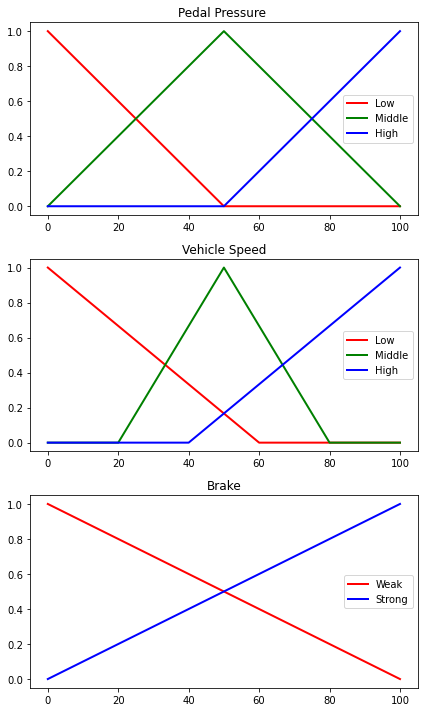

In [19]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize =(6, 10))

ax0.plot(x_pedal, pedal_low, 'r', linewidth = 2, label = 'Low')
ax0.plot(x_pedal, pedal_med, 'g', linewidth = 2, label = 'Middle')
ax0.plot(x_pedal, pedal_hig, 'b', linewidth = 2, label = 'High')
ax0.set_title('Pedal Pressure ')
ax0.legend()

ax1.plot(x_speed, speed_low, 'r', linewidth = 2, label = 'Low')
ax1.plot(x_speed, speed_med, 'g', linewidth = 2, label = 'Middle')
ax1.plot(x_speed, speed_hig, 'b', linewidth = 2, label = 'High')
ax1.set_title('Vehicle Speed')
ax1.legend()

ax2.plot(y_brake, brake_poor, 'r', linewidth = 2, label = 'Weak')
ax2.plot(y_brake, brake_strong, 'b', linewidth = 2, label = 'Strong')
ax2.set_title('Brake')
ax2.legend()

plt.tight_layout()

input_pedal = 30
input_speed = 95

#### Step 6. Calculation of Membership Degrees

In [20]:
pedal_fit_low = fuzz.interp_membership(x_pedal, pedal_low, input_pedal)
pedal_fit_med = fuzz.interp_membership(x_pedal, pedal_med, input_pedal)
pedal_fit_hig = fuzz.interp_membership(x_pedal, pedal_hig, input_pedal)

speed_fit_low = fuzz.interp_membership(x_speed, speed_low, input_speed)
speed_fit_med = fuzz.interp_membership(x_speed, speed_med, input_speed)
speed_fit_hig = fuzz.interp_membership(x_speed, speed_hig, input_speed)

#### Step 7. Define Rules 

##### Rules: 

- RULE 1: IF Pedal Pressure Is Medium, THEN Brake Is Strong.
- RULE 2: IF Pedal Pressure Is High AND Vehicle Speed is High, THEN Brake Is Strong.
- RULE 3: IF Pedal Pressure is Low OR Vehicle Speed is Low, THEN Brake is Weak.
- RULE 4: IF THE Pedal Pressure IS Low, THEN THE Brake Is Weak.

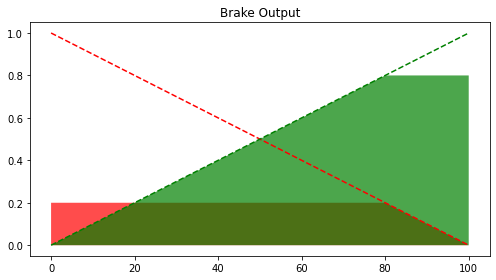

In [21]:
rule1 = np.fmin(pedal_fit_med, brake_strong)
rule2 = np.fmin(np.fmin(pedal_fit_hig, speed_fit_hig), brake_strong)
rule3 = np.fmin(np.fmax(pedal_fit_low, speed_fit_low), brake_poor)
rule4 = np.fmin(pedal_fit_low, brake_poor)

brake0 = np.zeros_like(y_brake)

fig, ax0 = plt.subplots(figsize = (7, 4))
ax0.fill_between(y_brake, brake0, out_poor, facecolor = 'r', alpha = 0.7)
ax0.plot(y_brake, brake_poor, 'r', linestyle = '--')
ax0.fill_between(y_brake, brake0, out_strong, facecolor = 'g', alpha = 0.7)
ax0.plot(y_brake, brake_strong, 'g', linestyle = '--')
ax0.set_title('Brake Output')

plt.tight_layout()

#### Step 8.  Defuzzification

In [22]:
out_brake = np.fmax(out_poor, out_strong)

defuzzified  = fuzz.defuzz(y_brake, out_brake, 'centroid')

result = fuzz.interp_membership(y_brake, out_brake, defuzzified)

print("(Brake) Output Value:", defuzzified)

(Brake) Output Value: 63.200000000000074


#### Step 9. Plot the Output 

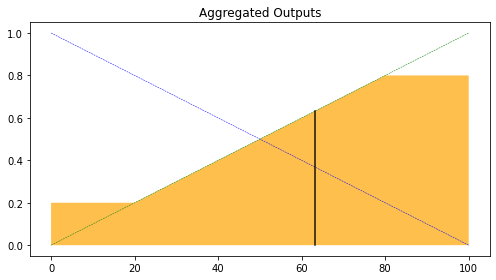

In [23]:

fig, ax0 = plt.subplots(figsize=(7, 4))

ax0.plot(y_brake, brake_poor, 'b', linewidth = 0.5, linestyle = '--')
ax0.plot(y_brake, brake_strong, 'g', linewidth = 0.5, linestyle = '--')
ax0.fill_between(y_brake, brake0, out_brake, facecolor = 'Orange', alpha = 0.7)
ax0.plot([defuzzified , defuzzified], [0, result], 'k', linewidth = 1.5, alpha = 0.9)
ax0.set_title('Aggregated Outputs')

plt.tight_layout()

#### Conclusion: 

Accordingly, the calculated output value for the variable Brake is 63.2%. proposed an output value that would drive the hydraulic system with a rate of about 63% for braking, versus 30% pedal pressure and 95 mph vehicle speed.
